In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

41.41548132430381 -137.89937651627787
44.84255391234211 -72.84738961838214
63.69218999986148 23.026689232449655
-13.368778261058367 141.4137001916797
36.90119737194409 46.62291253118994
-27.63499906760822 1.22261431150568
27.920925502929833 141.745158014391
-58.440007438939844 -82.92070087354918
53.05852888259281 173.70870704955644
58.434683746572944 -42.06526417884436
85.02724663138898 -132.57877868994612
-5.214817769966075 -166.64370396647107
4.846757992221882 160.53980616758503
69.76782071683598 -160.63639038280536
-51.17479319247134 -68.93012947220953
26.939854620514794 29.712002589085102
-53.81202045646896 -91.44761623127246
70.96944167116348 -87.19798194099842
6.09603455364325 -27.192943691356504
84.16904927616139 140.2818660241373
82.68722208113323 82.35357711677528
-84.3115999142803 97.29744835024167
60.350415105402845 -144.78247168206542
-53.80701362380535 152.2449915720385
-27.35422652738106 36.242260982919646
-14.871669078373827 165.26017414354374
-56.08152114892003 11.52994

59.83153476544342 -88.52262527682899
-48.34533787078756 11.219658281516132
64.18241955106325 -168.4358604165475
-33.85451904396001 -3.3680631244319557
85.90907862810218 -85.40334378053419
31.660710138135357 -54.731880350209096
4.132456256735239 84.7117805241441
67.63461722049118 -60.75398917529344
59.84847203567523 -150.45788303332085
68.3764292186982 -105.17771228970396
45.38644343873017 73.82920798274873
63.07944899139983 4.195111615383354
-17.64774050333007 -109.72103848969414
70.54939323616793 -114.20843725576364
-74.55042701277588 52.08254518011748
-83.80409804992654 -32.781836506322776
-32.854605873130254 10.827748708589866
-28.222329990909294 -19.664408448084572
31.475168154576693 135.10235303560893
53.58335894567114 93.51973853689344
-19.300905172717137 -75.26695764069694
-10.338999140799956 -61.64495465216356
-29.385781655045292 -145.16381710098435
-5.4242975215961025 62.661580955793454
-16.186705426416367 64.69764110507006
-11.104953721605895 98.63643298672906
-0.822631743253

In [6]:
# import the citipy 
from citipy import citipy

In [7]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

624

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the requests library
import requests

# Import the API key. 
from config import weather_api_key

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | mazatlan
Processing Record 5 of Set 1 | nelidovo
Processing Record 6 of Set 1 | mecca
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | ventersburg
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | port blair
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | marystown
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | port hedland
Processing Record

Processing Record 41 of Set 4 | usmajac
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | talaja
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | disna
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | quatre cocos
Processing Record 49 of Set 4 | dunhua
Processing Record 50 of Set 4 | mancio lima
Processing Record 1 of Set 5 | semikarakorsk
Processing Record 2 of Set 5 | sao joao da barra
Processing Record 3 of Set 5 | dubenskiy
City not found. Skipping...
Processing Record 4 of Set 5 | werda
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | san quintin
Processing Record 7 of Set 5 | demyanovo
Processing Record 8 of Set 5 | cuamba
Processing Record 9 of Set 5 | beira
Processing Record 10 of Set 5 | pandan
Processing Record 11 of Set 5 | athens
Processing Record 12 of Set 5 | mayumba
Processing Record 13 of Set 5 | barentsburg
City not found. Skipping...

Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | nyazepetrovsk
Processing Record 30 of Set 8 | tekirdag
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | keti bandar
Processing Record 33 of Set 8 | yashkul
Processing Record 34 of Set 8 | wilmington
Processing Record 35 of Set 8 | dien bien
City not found. Skipping...
Processing Record 36 of Set 8 | yashkino
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | phalaborwa
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | narasannapeta
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | santiago del estero
Processing Record 43 of Set 8 | agadez
Processing Record 44 of Set 8 | solnechnyy
Processing Record 45 of Set 8 | chifeng
Processing Record 46 of Set 8 | yumen
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | cerritos
Processing Record 49 of Set 8 | katherine
Processing Record 50 of Set 8 | darhan
Proce

Processing Record 14 of Set 12 | hodosa
Processing Record 15 of Set 12 | longlac
City not found. Skipping...
Processing Record 16 of Set 12 | shache
Processing Record 17 of Set 12 | maymyo
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | comodoro rivadavia
Processing Record 20 of Set 12 | omsukchan
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | alice springs
Processing Record 23 of Set 12 | sale
Processing Record 24 of Set 12 | butler
Processing Record 25 of Set 12 | aksarka
Processing Record 26 of Set 12 | abnub
Processing Record 27 of Set 12 | tochio
Processing Record 28 of Set 12 | bud
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | kichmengskiy gorodok
Processing Record 31 of Set 12 | irece
Processing Record 32 of Set 12 | dongsheng
Processing Record 33 of Set 12 | seminole
Processing Record 34 of Set 12 | lasa
Processing Record 35 of Set 12 | toliary
City not found. Skipping...
Processing Record

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,37.38,89,92,3.74,RU,2022-05-30 19:00:31
1,Chokurdakh,70.6333,147.9167,32.99,82,82,10.49,RU,2022-05-30 19:00:31
2,Saldanha,-33.0117,17.9442,56.93,69,1,4.83,ZA,2022-05-30 19:00:31
3,Mazatlan,23.2167,-106.4167,87.03,77,6,5.01,MX,2022-05-30 18:56:09
4,Nelidovo,56.2211,32.7774,51.87,86,100,5.50,RU,2022-05-30 19:00:32
5,Mecca,21.4267,39.8261,90.70,20,2,6.89,SA,2022-05-30 19:00:02
6,Albany,42.6001,-73.9662,87.58,49,45,7.29,US,2022-05-30 19:00:32
7,Torbay,47.6666,-52.7314,66.27,72,36,5.01,CA,2022-05-30 19:00:32
8,Puerto Ayora,-0.7393,-90.3518,74.16,80,87,9.78,EC,2022-05-30 19:00:33
9,Pevek,69.7008,170.3133,33.87,83,100,1.63,RU,2022-05-30 19:00:33


In [33]:
re_order_citydata_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[re_order_citydata_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2022-05-30 19:00:31,65.5833,-171.0000,37.38,89,92,3.74
1,Chokurdakh,RU,2022-05-30 19:00:31,70.6333,147.9167,32.99,82,82,10.49
2,Saldanha,ZA,2022-05-30 19:00:31,-33.0117,17.9442,56.93,69,1,4.83
3,Mazatlan,MX,2022-05-30 18:56:09,23.2167,-106.4167,87.03,77,6,5.01
4,Nelidovo,RU,2022-05-30 19:00:32,56.2211,32.7774,51.87,86,100,5.50
5,Mecca,SA,2022-05-30 19:00:02,21.4267,39.8261,90.70,20,2,6.89
6,Albany,US,2022-05-30 19:00:32,42.6001,-73.9662,87.58,49,45,7.29
7,Torbay,CA,2022-05-30 19:00:32,47.6666,-52.7314,66.27,72,36,5.01
8,Puerto Ayora,EC,2022-05-30 19:00:33,-0.7393,-90.3518,74.16,80,87,9.78
9,Pevek,RU,2022-05-30 19:00:33,69.7008,170.3133,33.87,83,100,1.63


In [37]:
#Create the output file (CSV). 
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

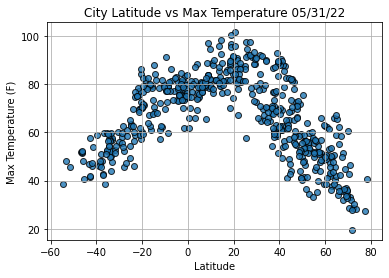

In [42]:
# import the time module
import time

# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig1.png")

# show plot. 
plt.show()

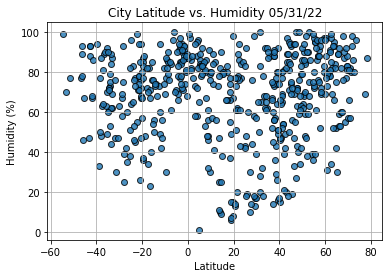

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

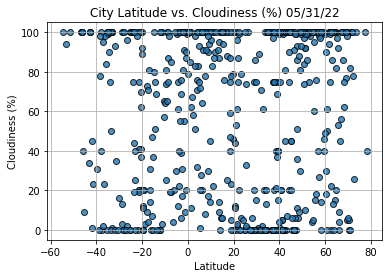

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

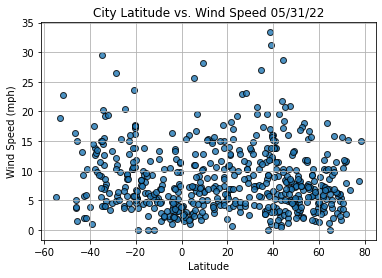

In [47]:
# Build the scatter plots for latitude vs. wind speed. 
plt.scatter(lats, wind_speed, edgecolor="black", 
            linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2022-05-30 19:00:31,65.5833,-171.0000,37.38,89,92,3.74
1,Chokurdakh,RU,2022-05-30 19:00:31,70.6333,147.9167,32.99,82,82,10.49
3,Mazatlan,MX,2022-05-30 18:56:09,23.2167,-106.4167,87.03,77,6,5.01
4,Nelidovo,RU,2022-05-30 19:00:32,56.2211,32.7774,51.87,86,100,5.50
5,Mecca,SA,2022-05-30 19:00:02,21.4267,39.8261,90.70,20,2,6.89


In [52]:
# create Northern and Southern Hemisphere DataFrames. 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


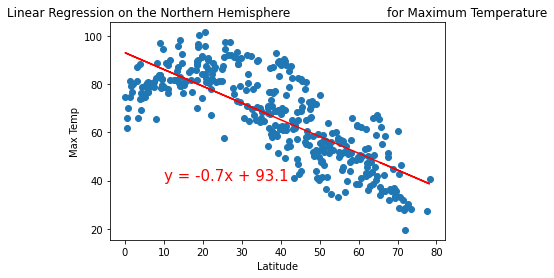

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function. 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

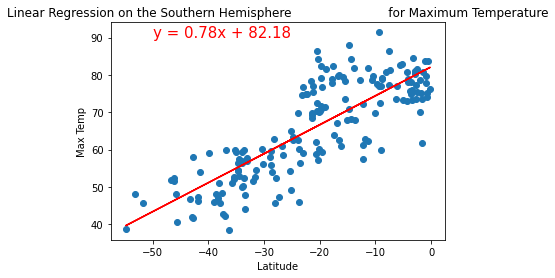

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

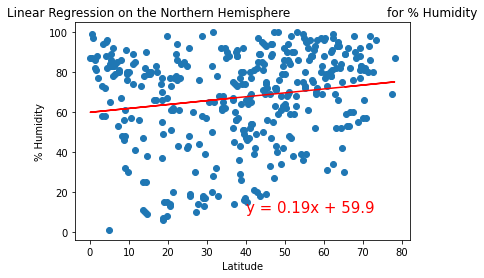

In [78]:
# Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

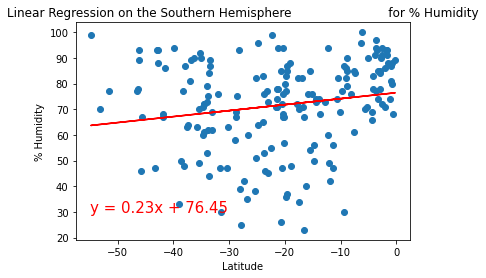

In [79]:
# Humidity
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))

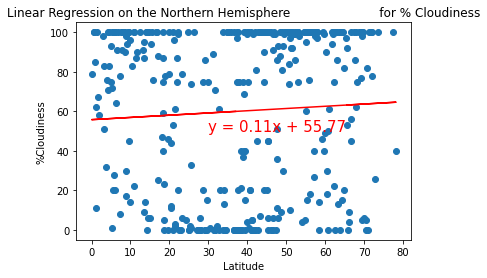

In [89]:
# Cloudiness
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '%Cloudiness', (30,50))

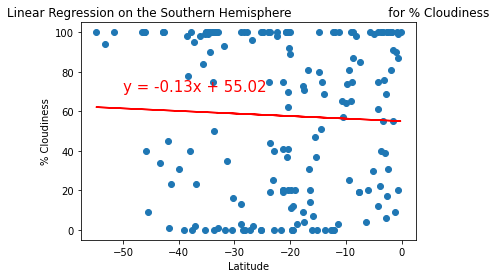

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,70))

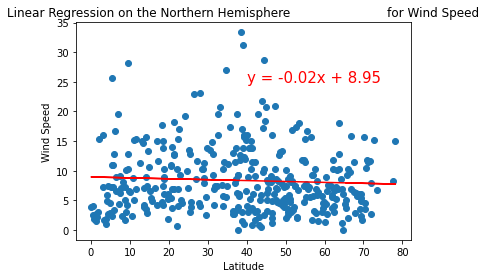

In [91]:
# Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

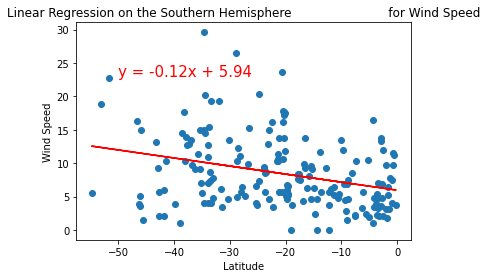

In [94]:
# Wind Speed
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,23))